# SVM REGRESION

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [40]:
# where to save the figure
ROOT = '.'
CHAPTER_ID = 'svm'
IMAGES_PATH = os.path.join(ROOT,'images',CHAPTER_ID)
os.makedirs(IMAGES_PATH,exist_ok=True)
def save_fig(fig_id,tight_layout=True, fig_extension='png',resolution=300):
    path = os.path.join(IMAGES_PATH,fig_id + '.' +fig_extension)
    print('saving images figure',fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format=fig_extension,dpi=resolution)

In [41]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m,1)).ravel()


In [42]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5,random_state=42)
svm_reg.fit(X,y)

LinearSVR(epsilon=1.5, random_state=42)

In [43]:
# generate the model to compare
svm_reg1= LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)

svm_reg1.fit(X,y)
svm_reg2.fit(X,y)
# dikarenakan linar svm tidak memiliki sebuah support vector automatic
def find_suport_vector(svm_reg,X,y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred)>= svm_reg.epsilon)
    return np.argwhere(off_margin)
svm_reg1.support_ = find_suport_vector(svm_reg1,X,y)
svm_reg2.support_ = find_suport_vector(svm_reg2,X,y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

In [44]:
def plot_svm_regression(svm_reg,X,y,axes):
    x1s = np.linspace(axes[0], axes[1],100).reshape(100,1)
    y_pred = svm_reg.predict(x1s)
    # create the garis boundary
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    # create the margin
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    # plot the support vector
    plt.scatter(X[svm_reg.support_],y[svm_reg.support_],s=180,facecolors='#FFAAAA')
    # plot data
    plt.plot(X,y,'bo')
    
    plt.xlabel(r'$x_1$',fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

saving images figure svm_regression_plot


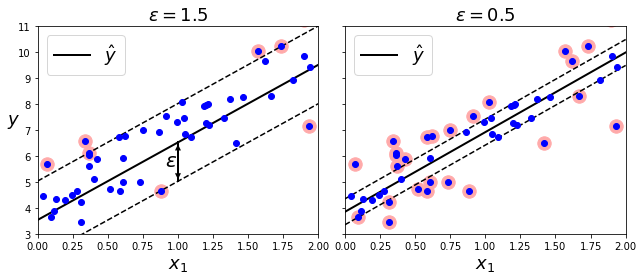

In [45]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
save_fig("svm_regression_plot")
plt.show()

# Non Linear Data

In [46]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel='poly',degree=2,C=100,epsilon=0.1,gamma='scale')
svm_poly_reg.fit(X,y)

SVR(C=100, degree=2, kernel='poly')

In [47]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()# kuadratic data

In [48]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

saving images figure svm_with_polynomial_kernel_plot


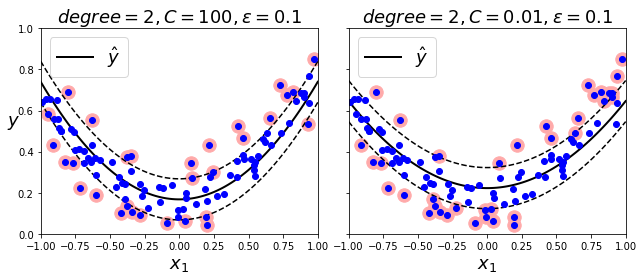

In [49]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y,axes=[-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y,axes= [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
save_fig("svm_with_polynomial_kernel_plot")
plt.show()